# Final Project - Logistic Regression
Logistic Regression for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

# Imports

In [54]:
# Importing the libraries to be used:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1] - data[:, -1].min()
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y[y<=2] = 0.
    y[y==3] = 1.
    y[y>3] = 2.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print("The shape of the wines dataset:")
    print(data.shape)
    print(y[:10])
    print(X[:10, :])

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(X) # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

# Logistic Regression with Lasso (L1) Regularization

In [56]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # TODO - Create the Logistic Regression model object as described above and save it to logreg - 5 points
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # TODO - Fit the model on the training set
    logreg.fit(X_train, y_train)

    # TODO - Find the prediction on training set
    Yhat_train = logreg.predict(X_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    # TODO - Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    print(confusion_matrix(y_test, Yhat_test))
    print(classification_report(y_test, Yhat_test))

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

# Logistic Regression with Ridge(L2) Regularization.

In [57]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # TODO - Fit the model on the training set - 5 points
    logreg2.fit(X_train, Y_train)

    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    # TODO - Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    print(confusion_matrix(y_test, Yhat_test))
    print(classification_report(y_test, Yhat_test))

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

In [58]:
def train_and_plot(X_train, y_train, X_test, y_test):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    c_logreg = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    for c in c_logreg:
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = []
    c_logreg2 = c_logreg
    for c in c_logreg2:
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [59]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [60]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([ 10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(1599, 12)
[0. 0. 1. 2. 0. 1. 0. 1. 0. 2.]
[[7.7000e+00 6.9000e-01 5.0000e-02 2.7000e+00 7.5000e-02 1.5000e+01
  2.7000e+01 9.9740e-01 3.2600e+00 6.1000e-01 9.1000e+00]
 [7.2000e+00 5.6000e-01 2.6000e-01 2.0000e+00 8.3000e-02 1.3000e+01
  1.0000e+02 9.9586e-01 3.2600e+00 5.2000e-01 9.9000e+00]
 [7.3000e+00 5.2000e-01 3.2000e-01 2.1000e+00 7.0000e-02 5.1000e+01
  7.0000e+01 9.9418e-01 3.3400e+00 8.2000e-01 1.2900e+01]
 [7.7000e+00 9.1500e-01 1.2000e-01 2.2000e+00 1.4300e-01 7.0000e+00
  2.3000e+01 9.9640e-01 3.3500e+00 6.5000e-01 1.0200e+01]
 [8.6000e+00 5.5000e-01 9.0000e-02 3.3000e+00 6.8000e-02 8.0000e+00
  1.7000e+01 9.9735e-01 3.2300e+00 4.4000e-01 1.0000e+01]
 [1.0000e+01 4.9000e-01 2.0000e-01 1.1000e+01 7.1000e-02 1.3000e+01
  5.0000e+01 1.0015e+00 3.1600e+00 6.9000e-01 9.200

Accuracy on training data = 0.401876
[[  0 157   0]
 [  0 124   0]
 [  0  39   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       157
         1.0       0.39      1.00      0.56       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.39       320
   macro avg       0.13      0.33      0.19       320
weighted avg       0.15      0.39      0.22       320

Accuracy on test data = 0.387500
Accuracy on training data = 0.458952
[[157   0   0]
 [124   0   0]
 [ 39   0   0]]
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       157
         1.0       0.00      0.00      0.00       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.49       320
   macro avg       0.16      0.33      0.22       320
weighted avg       0.24      0.49      0.32       320

Accuracy on test data = 0.490625
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.634089
[[111  45   1]
 [ 35  76  13]
 [  1  23  15]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       157
         1.0       0.53      0.61      0.57       124
         2.0       0.52      0.38      0.44        39

    accuracy                           0.63       320
   macro avg       0.60      0.57      0.58       320
weighted avg       0.64      0.63      0.63       320

Accuracy on test data = 0.631250


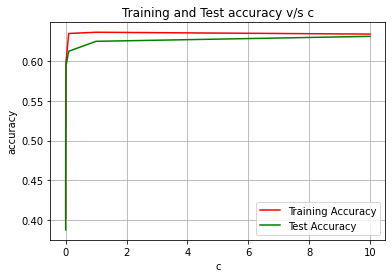

Accuracy on training data = 0.468335
[[157   0   0]
 [119   5   0]
 [ 32   7   0]]
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68       157
         1.0       0.42      0.04      0.07       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.51       320
   macro avg       0.31      0.35      0.25       320
weighted avg       0.41      0.51      0.36       320

Accuracy on test data = 0.506250
Accuracy on training data = 0.590305
[[133  24   0]
 [ 67  57   0]
 [  4  35   0]]
              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74       157
         1.0       0.49      0.46      0.47       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.59       320
   macro avg       0.38      0.44      0.40       320
weighted avg       0.51      0.59      0.55       320

Accuracy on test data = 0.593750
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

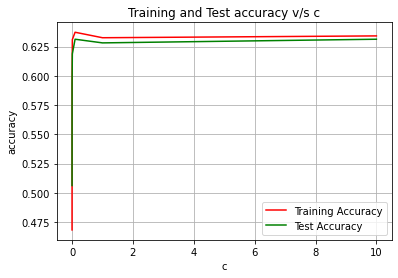

In [61]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.458952
[[157   0   0]
 [124   0   0]
 [ 39   0   0]]
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       157
         1.0       0.00      0.00      0.00       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.49       320
   macro avg       0.16      0.33      0.22       320
weighted avg       0.24      0.49      0.32       320

Accuracy on test data = 0.490625
Accuracy on training data = 0.458952
[[157   0   0]
 [124   0   0]
 [ 39   0   0]]
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       157
         1.0       0.00      0.00      0.00       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.49       320
   macro avg       0.16      0.33      0.22       320
weighted avg       0.24      0.49      0.32       320

Accuracy on test data = 0.490625


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.603597
[[121  36   0]
 [ 55  69   0]
 [  5  34   0]]
              precision    recall  f1-score   support

         0.0       0.67      0.77      0.72       157
         1.0       0.50      0.56      0.52       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.59       320
   macro avg       0.39      0.44      0.41       320
weighted avg       0.52      0.59      0.55       320

Accuracy on test data = 0.593750


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.657545
[[114  43   0]
 [ 39  76   9]
 [  1  22  16]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       157
         1.0       0.54      0.61      0.57       124
         2.0       0.64      0.41      0.50        39

    accuracy                           0.64       320
   macro avg       0.64      0.58      0.60       320
weighted avg       0.65      0.64      0.64       320

Accuracy on test data = 0.643750
Accuracy on training data = 0.688038
[[118  39   0]
 [ 37  73  14]
 [  2  20  17]]
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       157
         1.0       0.55      0.59      0.57       124
         2.0       0.55      0.44      0.49        39

    accuracy                           0.65       320
   macro avg       0.62      0.59      0.60       320
weighted avg       0.65      0.65      0.65       320

Accuracy on test data = 0.650000
Accura

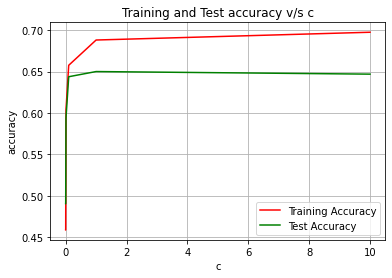

Accuracy on training data = 0.506646
[[150   7   0]
 [ 91  33   0]
 [ 26  13   0]]
              precision    recall  f1-score   support

         0.0       0.56      0.96      0.71       157
         1.0       0.62      0.27      0.37       124
         2.0       0.00      0.00      0.00        39

    accuracy                           0.57       320
   macro avg       0.39      0.41      0.36       320
weighted avg       0.52      0.57      0.49       320

Accuracy on test data = 0.571875
Accuracy on training data = 0.616106
[[121  36   0]
 [ 50  72   2]
 [  6  27   6]]
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       157
         1.0       0.53      0.58      0.56       124
         2.0       0.75      0.15      0.26        39

    accuracy                           0.62       320
   macro avg       0.66      0.50      0.51       320
weighted avg       0.63      0.62      0.60       320

Accuracy on test data = 0.621875
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.686474
[[117  40   0]
 [ 35  74  15]
 [  1  19  19]]
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       157
         1.0       0.56      0.60      0.58       124
         2.0       0.56      0.49      0.52        39

    accuracy                           0.66       320
   macro avg       0.63      0.61      0.62       320
weighted avg       0.66      0.66      0.66       320

Accuracy on test data = 0.656250
Accuracy on training data = 0.698984
[[115  41   1]
 [ 35  74  15]
 [  1  17  21]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75       157
         1.0       0.56      0.60      0.58       124
         2.0       0.57      0.54      0.55        39

    accuracy                           0.66       320
   macro avg       0.63      0.62      0.63       320
weighted avg       0.66      0.66      0.66       320

Accuracy on test data = 0.656250
Accura

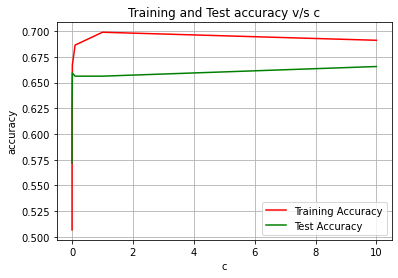

In [62]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

# Train White Wines Data

In [63]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([  20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6]))
Current y hist: (array([1640, 2198, 1060]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(4898, 12)
[0. 2. 1. 0. 1. 1. 1. 1. 1. 1.]
[[6.4000e+00 2.9000e-01 4.4000e-01 3.6000e+00 2.0000e-01 7.5000e+01
  1.8100e+02 9.9420e-01 3.0200e+00 4.1000e-01 9.1000e+00]
 [6.5000e+00 1.8000e-01 3.1000e-01 1.7000e+00 4.4000e-02 3.0000e+01
  1.2700e+02 9.9280e-01 3.4900e+00 5.0000e-01 1.0200e+01]
 [8.3000e+00 3.0000e-01 3.6000e-01 1.0000e+01 4.2000e-02 3.3000e+01
  1.6900e+02 9.9820e-01 3.2300e+00 5.1000e-01 9.3000e+00]
 [6.7000e+00 1.8000e-01 3.0000e-01 6.4000e+00 4.8000e-02 4.0000e+01
  2.5100e+02 9.9560e-01 3.2900e+00 5.2000e-01 1.0000e+01]
 [7.9000e+00 2.6000e-01 3.3000e-01 1.0300e+01 3.9000e-02 7.3000e+01
  2.1200e+02 9.9690e-01 2.9300e+00 4.9000e-01 9.5000e+00]
 [6.2000e+00 2.8000e-01 2.7000e-01 1.0300e+01 3.0000e-02 2.6000e+01
  1.0800e+02 9.9388e-01 3.2000e+00

Accuracy on training data = 0.451251
[[  0 319   0]
 [  0 430   0]
 [  0 231   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       319
         1.0       0.44      1.00      0.61       430
         2.0       0.00      0.00      0.00       231

    accuracy                           0.44       980
   macro avg       0.15      0.33      0.20       980
weighted avg       0.19      0.44      0.27       980

Accuracy on test data = 0.438776
Accuracy on training data = 0.451251
[[  0 319   0]
 [  0 430   0]
 [  0 231   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       319
         1.0       0.44      1.00      0.61       430
         2.0       0.00      0.00      0.00       231

    accuracy                           0.44       980
   macro avg       0.15      0.33      0.20       980
weighted avg       0.19      0.44      0.27       980

Accuracy on test data = 0.438776
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.580653
[[182 136   1]
 [ 89 312  29]
 [  8 153  70]]
              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61       319
         1.0       0.52      0.73      0.61       430
         2.0       0.70      0.30      0.42       231

    accuracy                           0.58       980
   macro avg       0.62      0.53      0.55       980
weighted avg       0.61      0.58      0.56       980

Accuracy on test data = 0.575510
Accuracy on training data = 0.577080
[[177 139   3]
 [ 88 306  36]
 [  8 147  76]]
              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60       319
         1.0       0.52      0.71      0.60       430
         2.0       0.66      0.33      0.44       231

    accuracy                           0.57       980
   macro avg       0.61      0.53      0.55       980
weighted avg       0.59      0.57      0.56       980

Accuracy on test data = 0.570408
Accura

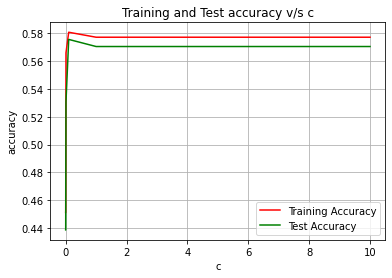

Accuracy on training data = 0.464523
[[ 17 302   0]
 [  5 425   0]
 [  0 231   0]]
              precision    recall  f1-score   support

         0.0       0.77      0.05      0.10       319
         1.0       0.44      0.99      0.61       430
         2.0       0.00      0.00      0.00       231

    accuracy                           0.45       980
   macro avg       0.41      0.35      0.24       980
weighted avg       0.45      0.45      0.30       980

Accuracy on test data = 0.451020
Accuracy on training data = 0.551812
[[152 166   1]
 [ 75 350   5]
 [ 14 209   8]]
              precision    recall  f1-score   support

         0.0       0.63      0.48      0.54       319
         1.0       0.48      0.81      0.61       430
         2.0       0.57      0.03      0.07       231

    accuracy                           0.52       980
   macro avg       0.56      0.44      0.40       980
weighted avg       0.55      0.52      0.46       980

Accuracy on test data = 0.520408
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.577080
[[177 138   4]
 [ 88 307  35]
 [  8 148  75]]
              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60       319
         1.0       0.52      0.71      0.60       430
         2.0       0.66      0.32      0.43       231

    accuracy                           0.57       980
   macro avg       0.61      0.53      0.54       980
weighted avg       0.59      0.57      0.56       980

Accuracy on test data = 0.570408


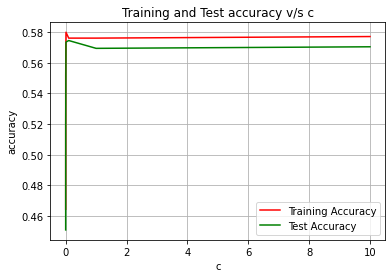

In [64]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.451251
[[  0 319   0]
 [  0 430   0]
 [  0 231   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       319
         1.0       0.44      1.00      0.61       430
         2.0       0.00      0.00      0.00       231

    accuracy                           0.44       980
   macro avg       0.15      0.33      0.20       980
weighted avg       0.19      0.44      0.27       980

Accuracy on test data = 0.438776
Accuracy on training data = 0.451251
[[  0 319   0]
 [  0 430   0]
 [  0 231   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       319
         1.0       0.44      1.00      0.61       430
         2.0       0.00      0.00      0.00       231

    accuracy                           0.44       980
   macro avg       0.15      0.33      0.20       980
weighted avg       0.19      0.44      0.27       980

Accuracy on test data = 0.438776


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.568913
[[184 133   2]
 [102 299  29]
 [  9 161  61]]
              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60       319
         1.0       0.50      0.70      0.58       430
         2.0       0.66      0.26      0.38       231

    accuracy                           0.56       980
   macro avg       0.60      0.51      0.52       980
weighted avg       0.58      0.56      0.54       980

Accuracy on test data = 0.555102
Accuracy on training data = 0.612302
[[192 124   3]
 [ 97 289  44]
 [ 11 130  90]]
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62       319
         1.0       0.53      0.67      0.59       430
         2.0       0.66      0.39      0.49       231

    accuracy                           0.58       980
   macro avg       0.61      0.55      0.57       980
weighted avg       0.60      0.58      0.58       980

Accuracy on test data = 0.582653
Accura

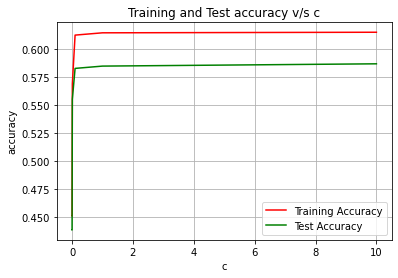

Accuracy on training data = 0.501787
[[ 58 261   0]
 [ 29 399   2]
 [  0 221  10]]
              precision    recall  f1-score   support

         0.0       0.67      0.18      0.29       319
         1.0       0.45      0.93      0.61       430
         2.0       0.83      0.04      0.08       231

    accuracy                           0.48       980
   macro avg       0.65      0.38      0.33       980
weighted avg       0.61      0.48      0.38       980

Accuracy on test data = 0.476531
Accuracy on training data = 0.589587
[[160 158   1]
 [ 79 323  28]
 [  9 160  62]]
              precision    recall  f1-score   support

         0.0       0.65      0.50      0.56       319
         1.0       0.50      0.75      0.60       430
         2.0       0.68      0.27      0.39       231

    accuracy                           0.56       980
   macro avg       0.61      0.51      0.52       980
weighted avg       0.59      0.56      0.54       980

Accuracy on test data = 0.556122
Accura

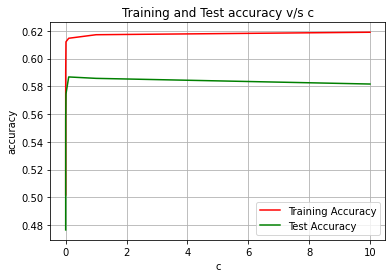

In [65]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

# Train All Wines Data

In [66]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([  30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6]))
Current y hist: (array([2384, 2836, 1277]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(6497, 12)
[2. 1. 1. 0. 2. 1. 2. 1. 1. 0.]
[[6.4000e+00 1.0500e-01 2.9000e-01 1.1000e+00 3.5000e-02 4.4000e+01
  1.4000e+02 9.9142e-01 3.1700e+00 5.5000e-01 1.0700e+01]
 [6.2000e+00 2.7000e-01 4.9000e-01 1.4000e+00 5.0000e-02 2.0000e+01
  7.4000e+01 9.9310e-01 3.3200e+00 4.4000e-01 9.8000e+00]
 [6.1000e+00 2.8000e-01 2.5000e-01 6.9000e+00 5.6000e-02 4.4000e+01
  2.0100e+02 9.9550e-01 3.1900e+00 4.0000e-01 9.1000e+00]
 [5.3000e+00 4.7000e-01 1.0000e-01 1.3000e+00 3.6000e-02 1.1000e+01
  7.4000e+01 9.9082e-01 3.4800e+00 5.4000e-01 1.1200e+01]
 [6.5000e+00 2.3000e-01 3.9000e-01 1.9000e+00 3.6000e-02 4.1000e+01
  9.8000e+01 9.9000e-01 3.1900e+00 4.3000e-01 1.1900e+01]
 [6.7000e+00 3.7000e-01 2.5000e-01 2.5000e+00 2.8000e-02 2.4000e+01
  8.4000e+01 9.9090e-01 3.1400e+00

Accuracy on training data = 0.425053
[[  0 447   0]
 [  0 627   0]
 [  0 226   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       447
         1.0       0.48      1.00      0.65       627
         2.0       0.00      0.00      0.00       226

    accuracy                           0.48      1300
   macro avg       0.16      0.33      0.22      1300
weighted avg       0.23      0.48      0.31      1300

Accuracy on test data = 0.482308
Accuracy on training data = 0.425053
[[  0 447   0]
 [  0 627   0]
 [  0 226   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       447
         1.0       0.48      1.00      0.65       627
         2.0       0.00      0.00      0.00       226

    accuracy                           0.48      1300
   macro avg       0.16      0.33      0.22      1300
weighted avg       0.23      0.48      0.31      1300

Accuracy on test data = 0.482308
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.577833
[[302 139   6]
 [176 387  64]
 [ 20 133  73]]
              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       447
         1.0       0.59      0.62      0.60       627
         2.0       0.51      0.32      0.40       226

    accuracy                           0.59      1300
   macro avg       0.57      0.54      0.55      1300
weighted avg       0.58      0.59      0.58      1300

Accuracy on test data = 0.586154
Accuracy on training data = 0.576294
[[301 139   7]
 [173 388  66]
 [ 19 131  76]]
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64       447
         1.0       0.59      0.62      0.60       627
         2.0       0.51      0.34      0.41       226

    accuracy                           0.59      1300
   macro avg       0.57      0.54      0.55      1300
weighted avg       0.58      0.59      0.58      1300

Accuracy on test data = 0.588462
Accura

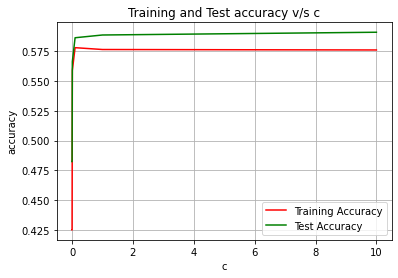

Accuracy on training data = 0.511641
[[187 260   0]
 [101 526   0]
 [  9 217   0]]
              precision    recall  f1-score   support

         0.0       0.63      0.42      0.50       447
         1.0       0.52      0.84      0.65       627
         2.0       0.00      0.00      0.00       226

    accuracy                           0.55      1300
   macro avg       0.38      0.42      0.38      1300
weighted avg       0.47      0.55      0.48      1300

Accuracy on test data = 0.548462
Accuracy on training data = 0.559554
[[298 149   0]
 [187 428  12]
 [ 23 181  22]]
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.62       447
         1.0       0.56      0.68      0.62       627
         2.0       0.65      0.10      0.17       226

    accuracy                           0.58      1300
   macro avg       0.60      0.48      0.47      1300
weighted avg       0.59      0.58      0.54      1300

Accuracy on test data = 0.575385
Accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.576102
[[301 139   7]
 [173 389  65]
 [ 19 129  78]]
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64       447
         1.0       0.59      0.62      0.61       627
         2.0       0.52      0.35      0.41       226

    accuracy                           0.59      1300
   macro avg       0.57      0.55      0.55      1300
weighted avg       0.59      0.59      0.58      1300

Accuracy on test data = 0.590769
Accuracy on training data = 0.576102
[[301 139   7]
 [173 389  65]
 [ 19 129  78]]
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64       447
         1.0       0.59      0.62      0.61       627
         2.0       0.52      0.35      0.41       226

    accuracy                           0.59      1300
   macro avg       0.57      0.55      0.55      1300
weighted avg       0.59      0.59      0.58      1300

Accuracy on test data = 0.590769


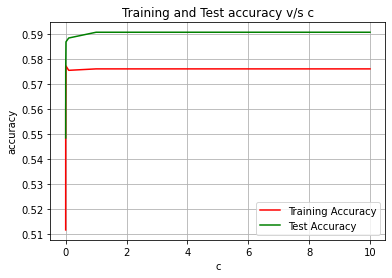

In [67]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.425053
[[  0 447   0]
 [  0 627   0]
 [  0 226   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       447
         1.0       0.48      1.00      0.65       627
         2.0       0.00      0.00      0.00       226

    accuracy                           0.48      1300
   macro avg       0.16      0.33      0.22      1300
weighted avg       0.23      0.48      0.31      1300

Accuracy on test data = 0.482308


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.425053
[[  0 447   0]
 [  0 627   0]
 [  0 226   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       447
         1.0       0.48      1.00      0.65       627
         2.0       0.00      0.00      0.00       226

    accuracy                           0.48      1300
   macro avg       0.16      0.33      0.22      1300
weighted avg       0.23      0.48      0.31      1300

Accuracy on test data = 0.482308


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy on training data = 0.569367
[[305 137   5]
 [197 392  38]
 [ 18 150  58]]
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63       447
         1.0       0.58      0.63      0.60       627
         2.0       0.57      0.26      0.35       226

    accuracy                           0.58      1300
   macro avg       0.58      0.52      0.53      1300
weighted avg       0.58      0.58      0.57      1300

Accuracy on test data = 0.580769
Accuracy on training data = 0.610160
[[308 134   5]
 [176 388  63]
 [ 14 126  86]]
              precision    recall  f1-score   support

         0.0       0.62      0.69      0.65       447
         1.0       0.60      0.62      0.61       627
         2.0       0.56      0.38      0.45       226

    accuracy                           0.60      1300
   macro avg       0.59      0.56      0.57      1300
weighted avg       0.60      0.60      0.60      1300

Accuracy on test data = 0.601538
Accura

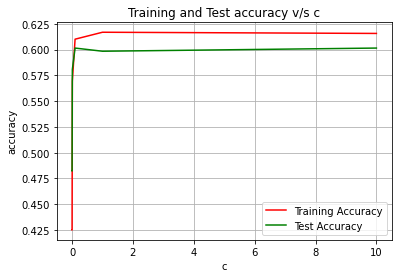

Accuracy on training data = 0.508755
[[175 272   0]
 [109 512   6]
 [  4 210  12]]
              precision    recall  f1-score   support

         0.0       0.61      0.39      0.48       447
         1.0       0.52      0.82      0.63       627
         2.0       0.67      0.05      0.10       226

    accuracy                           0.54      1300
   macro avg       0.60      0.42      0.40      1300
weighted avg       0.57      0.54      0.49      1300

Accuracy on test data = 0.537692
Accuracy on training data = 0.581104
[[288 157   2]
 [165 429  33]
 [ 12 154  60]]
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63       447
         1.0       0.58      0.68      0.63       627
         2.0       0.63      0.27      0.37       226

    accuracy                           0.60      1300
   macro avg       0.61      0.53      0.54      1300
weighted avg       0.60      0.60      0.58      1300

Accuracy on test data = 0.597692
Accura

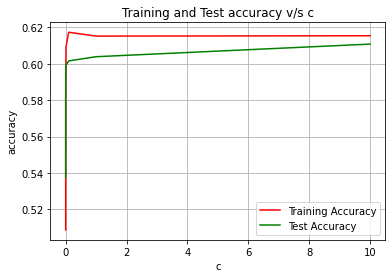

In [68]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

# Logistic Regression Using Polynomial Feature Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html